In [7]:
#insert the necessary library

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os 
from time import time
from time import sleep

In [2]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'fa7b39cd-73fc-4593-8141-0fa8cb77bede',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


{'status': {'timestamp': '2024-04-24T04:30:48.649Z', 'error_code': 0, 'error_message': None, 'elapsed': 26, 'credit_count': 1, 'notice': None, 'total_count': 9774}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11017, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [24]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

df2 = df

In [27]:
def API_Runer():
    global df,df2

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'fa7b39cd-73fc-4593-8141-0fa8cb77bede',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    
    df2 = df2.append(df)

    if not os.path.isfile(r"C:\Users\Micho\Desktop\python1\API.csv"):
        df.to_csv(r'C:\Users\Micho\Desktop\python1\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Micho\Desktop\python1\API.csv', mode='a', header=False)
        

In [28]:
for i in range(333):
    API_Runer()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [29]:
df72 = pd.read_csv(r'C:\Users\Micho\Desktop\python1\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11017,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00,19689390.00,...,53.41,1401927823382.14,nan,2024-04-24T04:30:00.000Z,nan,NaN,NaN,NaN,NaN,2024-04-24 04:32:20.363733
1,1,1027,Ethereum,ETH,ethereum,8859,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",nan,122047160.17,...,16.10,396417270355.71,nan,2024-04-24T04:30:00.000Z,nan,NaN,NaN,NaN,NaN,2024-04-24 04:32:20.363733
2,2,825,Tether USDt,USDT,tether,83855,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",nan,110463515619.01,...,4.49,112971182156.13,nan,2024-04-24T04:30:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-24 04:32:20.363733
3,3,1839,BNB,BNB,bnb,2151,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",nan,149532855.73,...,3.68,90561238123.50,nan,2024-04-24T04:30:00.000Z,nan,NaN,NaN,NaN,NaN,2024-04-24 04:32:20.363733
4,4,5426,Solana,SOL,solana,655,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",nan,447046945.07,...,2.86,90466227347.36,nan,2024-04-24T04:30:00.000Z,nan,NaN,NaN,NaN,NaN,2024-04-24 04:32:20.363733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,15,1975,Chainlink,LINK,chainlink,1736,2017-09-20T00:00:00.000Z,"['platform', 'defi', 'oracles', 'smart-contrac...",1000000000.00,587099970.45,...,0.37,15496860391.33,nan,2024-04-24T04:55:00.000Z,1027.00,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2024-04-24 04:56:38.633976
236,16,3890,Polygon,MATIC,polygon,1367,2019-04-28T00:00:00.000Z,"['pos', 'platform', 'enterprise-solutions', 'z...",10000000000.00,9899052852.05,...,0.30,7612268158.43,nan,2024-04-24T04:55:00.000Z,nan,NaN,NaN,NaN,NaN,2024-04-24 04:56:38.633976
237,17,6535,NEAR Protocol,NEAR,near-protocol,398,2020-08-11T00:00:00.000Z,"['platform', 'ai-big-data', 'staking', 'coinba...",nan,1065338424.00,...,0.30,8303168517.85,nan,2024-04-24T04:56:00.000Z,nan,NaN,NaN,NaN,NaN,2024-04-24 04:56:38.633976
238,18,8916,Internet Computer,ICP,internet-computer,235,2021-03-23T00:00:00.000Z,"['platform', 'distributed-computing', 'collect...",nan,463075834.53,...,0.28,7709894066.96,nan,2024-04-24T04:55:00.000Z,8916.00,ICP,ICP,internet-computer,ryjl3-tyaaa-aaaaa-aaaba-cai,2024-04-24 04:56:38.633976


In [30]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [31]:
df72 = pd.read_csv(r'C:\Users\Micho\Desktop\python1\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11017,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00,19689390.00,...,53.41,1401927823382.14,nan,2024-04-24T04:30:00.000Z,nan,NaN,NaN,NaN,NaN,2024-04-24 04:32:20.363733
1,1,1027,Ethereum,ETH,ethereum,8859,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",nan,122047160.17,...,16.10,396417270355.71,nan,2024-04-24T04:30:00.000Z,nan,NaN,NaN,NaN,NaN,2024-04-24 04:32:20.363733
2,2,825,Tether USDt,USDT,tether,83855,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",nan,110463515619.01,...,4.49,112971182156.13,nan,2024-04-24T04:30:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-24 04:32:20.363733
3,3,1839,BNB,BNB,bnb,2151,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",nan,149532855.73,...,3.68,90561238123.50,nan,2024-04-24T04:30:00.000Z,nan,NaN,NaN,NaN,NaN,2024-04-24 04:32:20.363733
4,4,5426,Solana,SOL,solana,655,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",nan,447046945.07,...,2.86,90466227347.36,nan,2024-04-24T04:30:00.000Z,nan,NaN,NaN,NaN,NaN,2024-04-24 04:32:20.363733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,15,1975,Chainlink,LINK,chainlink,1736,2017-09-20T00:00:00.000Z,"['platform', 'defi', 'oracles', 'smart-contrac...",1000000000.00,587099970.45,...,0.37,15496860391.33,nan,2024-04-24T04:55:00.000Z,1027.00,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2024-04-24 04:56:38.633976
236,16,3890,Polygon,MATIC,polygon,1367,2019-04-28T00:00:00.000Z,"['pos', 'platform', 'enterprise-solutions', 'z...",10000000000.00,9899052852.05,...,0.30,7612268158.43,nan,2024-04-24T04:55:00.000Z,nan,NaN,NaN,NaN,NaN,2024-04-24 04:56:38.633976
237,17,6535,NEAR Protocol,NEAR,near-protocol,398,2020-08-11T00:00:00.000Z,"['platform', 'ai-big-data', 'staking', 'coinba...",nan,1065338424.00,...,0.30,8303168517.85,nan,2024-04-24T04:56:00.000Z,nan,NaN,NaN,NaN,NaN,2024-04-24 04:56:38.633976
238,18,8916,Internet Computer,ICP,internet-computer,235,2021-03-23T00:00:00.000Z,"['platform', 'distributed-computing', 'collect...",nan,463075834.53,...,0.28,7709894066.96,nan,2024-04-24T04:55:00.000Z,8916.00,ICP,ICP,internet-computer,ryjl3-tyaaa-aaaaa-aaaba-cai,2024-04-24 04:56:38.633976


In [32]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.61,1.11,4.32,-0.76,31.54,67.72
Ethereum,0.88,2.81,4.67,-6.23,10.87,47.69
Tether USDt,-0.01,-0.05,-0.01,-0.00,0.05,0.05
BNB,0.36,1.17,11.22,3.83,60.23,110.57
Solana,1.40,2.92,12.09,-14.06,57.46,81.87
USDC,-0.00,-0.00,0.01,-0.00,0.03,0.01
XRP,0.71,0.84,10.19,-13.06,2.21,6.98
Dogecoin,-0.11,3.48,2.87,-6.27,91.15,109.64
Toncoin,1.49,1.86,-10.80,6.42,181.02,179.42


In [33]:
df4 = df3.stack()
df4

name                                  
Bitcoin   quote.USD.percent_change_1h     0.61
          quote.USD.percent_change_24h    1.11
          quote.USD.percent_change_7d     4.32
          quote.USD.percent_change_30d   -0.76
          quote.USD.percent_change_60d   31.54
                                          ... 
Litecoin  quote.USD.percent_change_24h    2.44
          quote.USD.percent_change_7d     8.04
          quote.USD.percent_change_30d   -4.50
          quote.USD.percent_change_60d   24.30
          quote.USD.percent_change_90d   31.90
Length: 120, dtype: float64

In [34]:
df5 = df4.to_frame(name='values')
df5

values
name                                         
Bitcoin  quote.USD.percent_change_1h     0.61
         quote.USD.percent_change_24h    1.11
         quote.USD.percent_change_7d     4.32
         quote.USD.percent_change_30d   -0.76
         quote.USD.percent_change_60d   31.54
...                                       ...
Litecoin quote.USD.percent_change_24h    2.44
         quote.USD.percent_change_7d     8.04
         quote.USD.percent_change_30d   -4.50
         quote.USD.percent_change_60d   24.30
         quote.USD.percent_change_90d   31.90

[120 rows x 1 columns]

In [35]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.61
1,Bitcoin,quote.USD.percent_change_24h,1.11
2,Bitcoin,quote.USD.percent_change_7d,4.32
3,Bitcoin,quote.USD.percent_change_30d,-0.76
4,Bitcoin,quote.USD.percent_change_60d,31.54
...,...,...,...
115,Litecoin,quote.USD.percent_change_24h,2.44
116,Litecoin,quote.USD.percent_change_7d,8.04
117,Litecoin,quote.USD.percent_change_30d,-4.50
118,Litecoin,quote.USD.percent_change_60d,24.30


In [36]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.61
1,Bitcoin,quote.USD.percent_change_24h,1.11
2,Bitcoin,quote.USD.percent_change_7d,4.32
3,Bitcoin,quote.USD.percent_change_30d,-0.76
4,Bitcoin,quote.USD.percent_change_60d,31.54
...,...,...,...
115,Litecoin,quote.USD.percent_change_24h,2.44
116,Litecoin,quote.USD.percent_change_7d,8.04
117,Litecoin,quote.USD.percent_change_30d,-4.50
118,Litecoin,quote.USD.percent_change_60d,24.30


In [37]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1,0.61
1,Bitcoin,24h,1.11
2,Bitcoin,7d,4.32
3,Bitcoin,30d,-0.76
4,Bitcoin,60d,31.54
...,...,...,...
115,Litecoin,24h,2.44
116,Litecoin,7d,8.04
117,Litecoin,30d,-4.50
118,Litecoin,60d,24.30


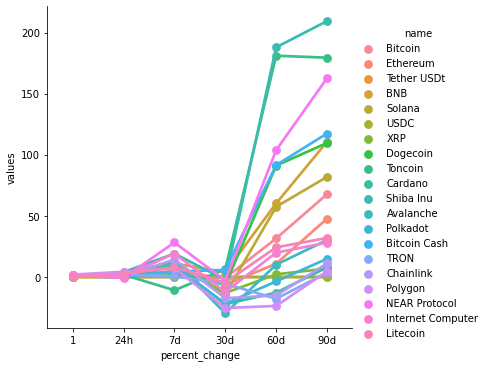

In [38]:

sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [40]:
df10 = df2[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,66746.18,2024-04-24 04:53:08.292097
0,Bitcoin,66994.40,2024-04-24 04:53:36.844737
0,Bitcoin,66986.93,2024-04-24 04:54:37.697104
0,Bitcoin,66962.66,2024-04-24 04:55:38.171891
0,Bitcoin,66996.22,2024-04-24 04:56:38.633976


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

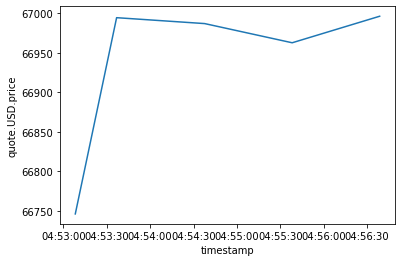

In [41]:
sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11017,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00,19689390.00,19689390.00,...,53.40,1400963039704.00,None,2024-04-24T04:38:00.000Z,nan,NaN,NaN,NaN,NaN,2024-04-24 04:39:25.922960
1,1027,Ethereum,ETH,ethereum,8859,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",nan,122047160.17,122047160.17,...,16.10,396024077448.77,None,2024-04-24T04:37:00.000Z,nan,NaN,NaN,NaN,NaN,2024-04-24 04:39:25.922960
2,825,Tether USDt,USDT,tether,83855,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",nan,110463515619.01,112936550461.62,...,4.49,112943637562.21,None,2024-04-24T04:37:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-24 04:39:25.922960
3,1839,BNB,BNB,bnb,2151,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",nan,149532855.73,149532855.73,...,3.68,90519359732.67,None,2024-04-24T04:37:00.000Z,nan,NaN,NaN,NaN,NaN,2024-04-24 04:39:25.922960
4,5426,Solana,SOL,solana,655,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",nan,447046945.07,574602547.31,...,2.86,90389815850.08,None,2024-04-24T04:37:00.000Z,nan,NaN,NaN,NaN,NaN,2024-04-24 04:39:25.922960
5,3408,USDC,USDC,usd-coin,18648,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",nan,33663337400.41,33663337400.41,...,1.37,33663342354.94,None,2024-04-24T04:37:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-24 04:39:25.922960
6,52,XRP,XRP,xrp,1306,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00,55129144019.00,99987674482.00,...,1.23,54826524105.27,None,2024-04-24T04:38:00.000Z,nan,NaN,NaN,NaN,NaN,2024-04-24 04:39:25.922960
7,74,Dogecoin,DOGE,dogecoin,958,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",nan,144012726383.71,144012726383.71,...,0.95,23287731296.36,None,2024-04-24T04:38:00.000Z,nan,NaN,NaN,NaN,NaN,2024-04-24 04:39:25.922960
8,11419,Toncoin,TON,toncoin,295,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",nan,3471327521.92,5105650254.12,...,0.82,29710572522.45,None,2024-04-24T04:37:00.000Z,nan,NaN,NaN,NaN,NaN,2024-04-24 04:39:25.922960
9,2010,Cardano,ADA,cardano,1150,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00,35633951592.64,36812929523.02,...,0.73,22592258551.57,None,2024-04-24T04:37:00.000Z,nan,NaN,NaN,NaN,NaN,2024-04-24 04:39:25.922960
